# Аналитика в Яндекс.Афише

## Оглавление
* [ЦЕЛЬ: Оптимизация маркетинговых затрат](#step1)

* [План исследования](#step2)

* [Описание данных](#step3)

* [Исследование](#step4)
    * [Шаг 1. Изучение и предобработка данных](#step5)
    * [Шаг 1. Вывод](#step6)
    * [Шаг 2. Построение отчётов и подсчёт метрик](#step7)
     * [Шаг 2.1 Продукт](#step8)
     * [Шаг 2.2 Продукт. Вывод](#step9)
     * [Шаг 2.3 Продажи](#step10)
     * [Шаг 2.4 Продажи. Вывод](#step11)
     * [Шаг 2.5 Маркетинг](#step12)
     * [Шаг 2.6 Маркетинг. Вывод](#step13)
           
* [Общие выводы](#step14)

## ЦЕЛЬ: Оптимизация маркетинговых затрат  <a id="step1"></a> 

Задача отдела аналитики Яндекс.Афиши - оптимизировать маркетинговые затраты. Для этого нужно изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда клиент окупается.

У нас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
* лог сервера с данными о посещениях сайта Яндекс.Афиши,
* выгрузка всех заказов за этот период,
* статистика рекламных расходов.


## План исследования:  <a id="step2"></a> 

**1. Шаг - загрузка и подготовка данных к анализу:**

Загрузка данные о визитах, заказах и расходах в переменные. Оптимизация данных для анализа. Проверка типа даннхы. 

**2. Шаг - построение отчётов и подсчёт метрик:**

В этом шаге нужно ответить на следующие вопросы: 
* **Продукт**
    * Сколько людей пользуются в день, неделю, месяц?
    * Сколько сессий в день?
    * Сколько длится одна сессия?
    * Как часто люди возвращаются?
* **Продажи**
    * Когда люди начинают покупать?
    * Сколько раз покупают за период?
    * Какой средний чек?
    * Сколько денег приносят? (LTV)
* **Маркетинг**
    * Сколько денег потратили? Всего / на каждый источник / по времени
    * Сколько стоило привлечение одного покупателя из каждого источника?
    * На сколько окупились расходы? (ROI)

Кроме того, нужно отобразить на графиках, как эти метрики отличаются по устройствам и по рекламным источникам, ак они меняются во времени.

**Общие выводы**

Какие источники/платформы можно порекомендовать, исходя из каких метрик? Какие выводы можно сделать, узнав значение метрик?

## Описание данных:  <a id="step3"></a> 

**Таблица visits (лог сервера с информацией о посещениях сайта):**

* Uid — уникальный идентификатор пользователя
* Device — категория устройства пользователя
* Start Ts — дата и время начала сессии
* End Ts — дата и время окончания сессии
* Source Id — идентификатор рекламного источника, из которого пришел пользователь

**Таблица orders (информация о заказах):**
* Uid — уникальный id пользователя, который сделал заказ
* Buy Ts — дата и время заказа
* Revenue — выручка Яндекс.Афиши с этого заказа

**Таблица costs (информация о затратах на маркетинг):**
* source_id — идентификатор рекламного источника
* dt — дата
* costs — затраты на этот рекламный источник в этот день

## Исследование <a id="step4"></a> 

## Шаг 1. Загрузка и подготовка данных к анализу  <a id="step5"></a> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
pd.set_option('display.max_columns', None) 

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [3]:
data_list = [visits, orders, costs]
data_names = ['visits', 'orders', 'costs']
for i in range(len(data_list)): 
    print(data_names[i], end='\n\n')
    print(data_list[i].shape)
    display(data_list[i].head())

visits

(359400, 5)


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


orders

(50415, 3)


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


costs

(2542, 3)


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Из первых двух таблиц видим, что на 359400 визитов приходится 50415 заказов. По таблице orders можно отследить, какой пользователь и в какой момент сделал заказ. Также можно подсчитать суммарную выручку по каждому пользователю. Не совсем понятно, в какой валюте указана выручка с каждого заказа (Revenue), но для нас лишь важно, что это какая-то единая валюта. Важный момент, что в таблице costs даты указаны с точностью до дня, а в двух других с точностью до минут.

В таблицах visits и costs фигурирует один и тот же параметр source_id — идентификатор рекламного источника, из которого пришел пользователь. Посмотрим, какие уникальные значения этого параметра присутствуют в обоих датасетах:

Приведём названия всех заголовков к стандартному написанию:

In [4]:
visits.rename(
    columns={'Device': 'device', 'End Ts': 'end_ts', 'Source Id': 'source_id',
             'Start Ts': 'start_ts', 'Uid': 'uid'}, inplace=True)

orders.rename(
    columns={'Buy Ts': 'buy_ts', 'Revenue': 'revenue', 'Uid': 'uid'}, inplace=True)
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
visits['source_id'].unique()

array([ 4,  2,  5,  9,  3,  1, 10,  7,  6])

In [6]:
costs['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10])

Видим, что параметр source_id принимает целые значения в диапазоне от одного до десяти включительно, при этом значение, равное восьми пропущено в обоих датасетах, а в таблице costs отсутствуют также значения, равные шести и семи. В следующем этапе посмотрим, как распределено количество посетителей по рекламным источникам и затраты Яндекс.Афиши на кадый источник.

In [7]:
visits['source_id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64

Посмотрим, есть ли пропущенные данные в таблицах:

In [8]:
for i in range(len(data_list)): 
    print(data_names[i], end='\n\n')
    print(data_list[i].isna().sum(), end='\n\n')

visits

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

orders

buy_ts     0
revenue    0
uid        0
dtype: int64

costs

source_id    0
dt           0
costs        0
dtype: int64



Пропущенных данных нет. Посмотрим теперь на типы данных в таблицах:

In [9]:
for i in range(len(data_list)): 
    print(data_names[i], end='\n\n')
    print(data_list[i].info(), end='\n\n')

visits

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null object
source_id    359400 non-null int64
start_ts     359400 non-null object
uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None

orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null object
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None

costs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None



В таблице visits данные о начале и конце сессии имеют тип object, а нужны в формате даты. Та же ситуация с Buy Ts — датой и времянем заказа в таблице orders и с датой dt в таблице costs. Произведём замену типа данных:

In [10]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

In [11]:
data_list = [visits, orders, costs]
data_names = ['visits', 'orders', 'costs']
for i in range(len(data_list)): 
    print(data_names[i], end='\n\n')
    display(data_list[i].head())

visits



,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


orders



,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


costs



,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [12]:
for i in range(len(data_list)): 
    print(data_names[i], end='\n\n')
    print(data_list[i].info(), end='\n\n')

visits

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
None

orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None

costs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None



Видим, что замена произошла успешно.

Проверим, нет ли в таблицах дубликатов:

In [13]:
for i in range(len(data_list)): 
    print(data_names[i], end='\n\n')
    print(data_list[i].duplicated().sum(), end='\n\n')

visits

0

orders

0

costs

0



## Шаг 1. Вывод  <a id="step6"></a> 

Нами были изучены таблицы visits, orders и costs: таблицы не содержат пропусков, или дубликатов. Проверены типы данных: все данные в столбцах с датами были преобразованы в соответствующий тип.

Исходя из данных в таблицах, мы знаем основные характеристики наших пользователей: когда у пользователя была первая активность, откуда он пришёл (из какого рекламного источника), делал ли пользователь заказы. Можно подсчитать, сколько условных денег потратил каждый пользователь, сколько времени он провёл на сайте (и на каком девайсе, а также на одном и том же, или на разных). Т.е. мы располагаем всеми необходимыми данными, чтобы сделать выводы о том, какие источники рекламы наиболее выгодны.

## Шаг 2. Построение отчётов и подсчёт метрик  <a id="step7"></a> 

### Шаг 2.1 Продукт  <a id="step8"></a> 

Для начала ответим на вопрос, сколько людей пользуются продуктом в день, неделю, месяц, т.е. подсчитаем метрики DAU, WAU и MAU. Для этого добавим в таблицу visits столбцы, в которые извлечём год, месяц и день пользовательской сессии из столбца Start Ts:

In [14]:
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_week']  = visits['start_ts'].astype('datetime64[W]')
visits['session_date'] = visits['start_ts'].astype('datetime64[D]')

In [15]:
visits.head()

,device,end_ts,source_id,start_ts,uid,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,2017-12-21,2017-12-27


In [16]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_month']).agg({'uid': 'nunique'}).mean()

print(f"В среднем в день продуктом пользуются {round(dau_total[0])} человек. В неделю - {round(wau_total[0])}, а в месяц - {round(mau_total[0])} человек.")

В среднем в день продуктом пользуются 908 человек. В неделю - 5724, а в месяц - 23228 человек.


Посмотрим, как зависят эти рассчёты от времени:

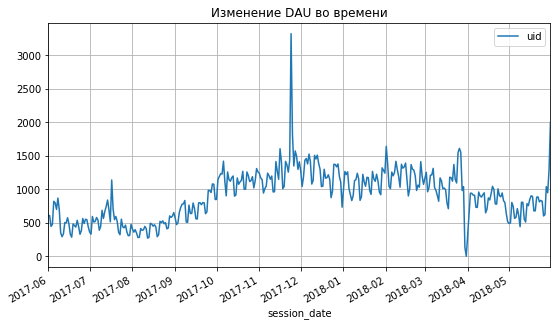

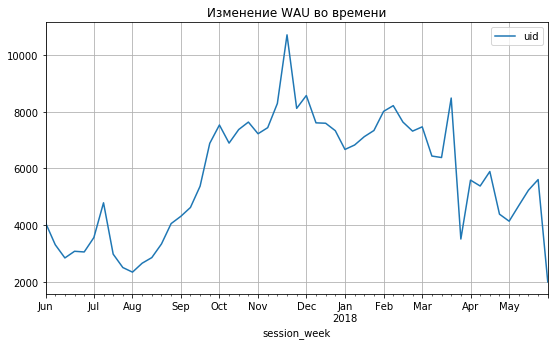

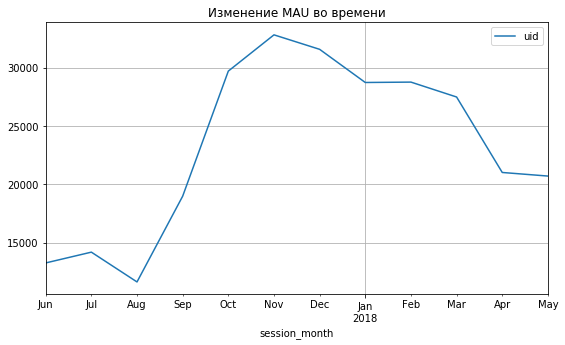

In [17]:
visits.groupby('session_date').agg({'uid': 'nunique'}).plot(grid=True, figsize=(9,5), title= 'Изменение DAU во времени')
visits.groupby('session_week').agg({'uid': 'nunique'}).plot(grid=True, figsize=(9,5), title= 'Изменение WAU во времени')
visits.groupby('session_month').agg({'uid': 'nunique'}).plot(grid=True, figsize=(9,5), title= 'Изменение MAU во времени')

Логично, что самый шумный график - изменение DAU во времени, поскольку дневные скачки числа пользователей могут быть большими, а график изменение MAU во времени - самый сглаженный. Самое высокое число посещений наблюдается в декабре 2017 года (показатель гораздо выше среднего значения тренда), в целом посещаемость в осенне-зимнее время выше, чем в летнее и весеннее. 

Подсчитаем среднее количество сессий в день:

In [18]:
sessions_per_user = visits.groupby(['session_date']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user.head()

,n_sessions,n_users
session_date,,
2017-06-01,664,605
2017-06-02,658,608
2017-06-03,477,445
2017-06-04,510,476
2017-06-05,893,820


In [19]:
sessions_per_user['n_sessions'].describe()

count     364.000000
mean      987.362637
std       418.994796
min         1.000000
25%       635.500000
50%      1003.000000
75%      1280.000000
max      4042.000000
Name: n_sessions, dtype: float64

Медиана и среднее количество сессий в день близки по значению, а стандартное отклонение составляет меньше половины медианного значения. Возьмём за характерную величину количества сессий в день среднее значение.

In [20]:
sessions_per_day = round(sessions_per_user['n_sessions'].mean())

print(f"Среднее количество сессий в день составляет {sessions_per_day}.")

Среднее количество сессий в день составляет 987.


Посмотрим, как зависит среднее количество сессий в день от времени:

In [21]:
sessions_per_user

,n_sessions,n_users
session_date,,
2017-06-01,664,605
2017-06-02,658,608
2017-06-03,477,445
2017-06-04,510,476
2017-06-05,893,820
...,...,...
2018-05-27,672,620
2018-05-28,1156,1039
2018-05-29,1035,948


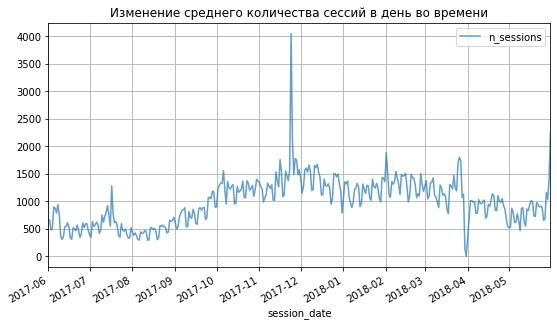

In [22]:
sessions_per_user.plot(y='n_sessions', kind='line', alpha=0.7, grid=True, figsize=(9,5), title= 'Изменение среднего количества сессий в день во времени')
plt.show()

По графику и таблице sessions_per_user видно, что количество сессий в день практически совпадает с количеством уникальных пользователей в день, а значит, среднее количество сессий в день практически совпадает с метрикой DAU. 

Перейдём к ответу на вопрос сколько длится одна сессия. Параметр ASL показывает, сколько длится сессия пользователя в среднем, т.е. посчитаем длину всех сессий и вычислим среднее:

In [23]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['session_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

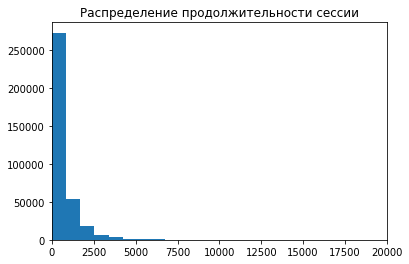

In [24]:
plt.hist(visits['session_duration_sec'], bins=100)
plt.title('Распределение продолжительности сессии')
plt.xlim(0,20000)
plt.show()

Распределение не является нормальным, тогда найдём моду (значение в выборке, которое встречается чаще всего):

In [25]:
session_duration_sec_mode = visits['session_duration_sec'].mode()
print(f"Характерная длительность сессии составляет {session_duration_sec_mode[0]} секунд.")

Характерная длительность сессии составляет 60 секунд.


Заключительный вопрос шага 2.1 звучит следующим образом:"Как часто люди возвращаются?". Чтобы ответить на этот вопрос, нужно разделить пользователей на когорты, подсчитать количество уникальных пользователей для каждой когорты в зависимости от её возраста. Параметр Retention Rate показывает, сколько пользователей из когорты относительно их изначального числа вернулось в последующие периоды. Разделим пользователей на когорты, в зависимоти от первого использования сервиса: все пользователи, обратившиеся к сервису в один календарный месяц, попадут в одну когорту:

In [26]:
visits.head()

,device,end_ts,source_id,start_ts,uid,session_month,session_week,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-14,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-15,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-17,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,2017-12-21,2017-12-27,0


In [106]:
first_activity_date = visits.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.join(first_activity_date,on='uid')
visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')

In [107]:
visits.head()

,uid,first_activity_date,device,end_ts,source_id,start_ts,session_month,session_week,session_date,session_duration_sec,first_activity_date_x,first_activity_month,cohort_lifetime,first_activity_date_y
0,11863502262781,2018-03-01 17:27:00,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018-03-01,2018-03-01,2018-03-01,360,2018-03-01 17:27:00,2018-03-01,0,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018-02-01,2018-02-01,2018-02-06,120,2018-02-06 15:55:00,2018-02-01,0,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017-06-01,2017-06-01,2017-06-07,60,2017-06-07 18:47:00,2017-06-01,0,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018-03-01,2018-03-08,2018-03-11,360,2017-09-18 22:49:00,2017-09-01,5,2017-09-18 22:49:00
4,313578113262317,2017-09-18 22:49:00,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-01,2017-09-14,2017-09-18,1080,2017-09-18 22:49:00,2017-09-01,0,2017-09-18 22:49:00


In [108]:
visits['cohort_lifetime'] = visits['start_ts'] - visits['first_activity_date']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].astype('int')

Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей на определённый «месяц жизни»:

In [109]:
cohorts = visits.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

Чтобы найти Retention Rate, нужно сперва получить число пользователей, изначально бывших в когорте, и на него разделить число пользователей в каждый следующий месяц.
Найдём исходное количество пользователей в когорте. Возьмём их число на нулевой месяц:

In [110]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]
# Переименуем столбец Uid в cohort_users
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 
# Объединим данные по когортам с исходным количеством пользователей в когорте:
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')

Рассчитаем Retention Rate. Разделим количество активных пользователей в каждую из недель на исходное число пользователей в когорте:

In [111]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
cohorts

,first_activity_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,784,13259,0.059130
2,2017-06-01,2,731,13259,0.055132
3,2017-06-01,3,898,13259,0.067728
4,2017-06-01,4,884,13259,0.066672
5,2017-06-01,5,917,13259,0.069161
6,2017-06-01,6,788,13259,0.059431
7,2017-06-01,7,738,13259,0.055660
8,2017-06-01,8,723,13259,0.054529
9,2017-06-01,9,612,13259,0.046157


Построим сводную таблицу и создадим тепловую карту:

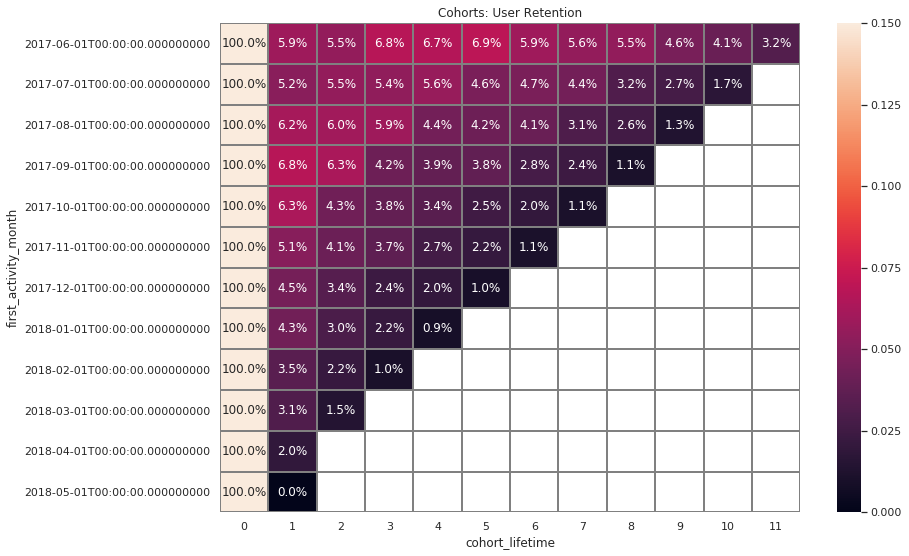

In [37]:
retention_pivot = (cohorts.pivot_table(
    index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
)
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, vmin=0, vmax=0.15, annot=True, fmt='.1%', linewidths=1, linecolor='gray')

<div class="alert alert-info"> <b>Комментарий студента:</b> Переделала. Приятно смотреть на "целую" тепловую карту.</div>

Видим, что показатели возвратности пользовалетей по всем когортам не превышают значения **6.9%**. По тепловой карте видно, что во всех когортах, кроме первой и второй поведение пользователей строго затухающее, т.е. все меньше и меньше пользователей из когорты возвращается.

In [38]:
#round(cohorts[cohorts['cohort_lifetime'] == 1]['uid'].mean())
print(f"В среднем на следующий месяц возвращается {round(cohorts[cohorts['cohort_lifetime'] == 1]['uid'].mean())} пользователя.")


В среднем на следующий месяц возвращается 843 пользователя.


Поскольку нам нужно посмотреть различие метрик по рекламным источникам и по устройствам, присвоим каждому пользователю два параметра: основное устройство (в качестве основного берём устройство, с которого пользователь заходил впервые) и рекламный источник (откуда пришёл пользователь впервые). Создадим новую таблицу users_parametrs:

In [39]:
users_parametrs = visits[visits['start_ts'] == visits['first_activity_date']][['uid', 'device', 'source_id']]
users_parametrs

,uid,device,source_id
0,16879256277535980062,touch,4
1,104060357244891740,desktop,2
2,7459035603376831527,touch,5
4,9969694820036681168,desktop,3
5,16007536194108375387,desktop,5
...,...,...,...
359395,18363291481961487539,desktop,2
359396,18370831553019119586,touch,1
359397,18387297585500748294,desktop,4
359398,18388616944624776485,desktop,5


In [40]:
devices = users_parametrs['device'].unique().tolist()
sources = sorted(users_parametrs['source_id'].unique().tolist())

Посмотрим, как отличаются показатели DAU, WAU и MAU для клиентов из разных рекламных источников и для разных девайсов:

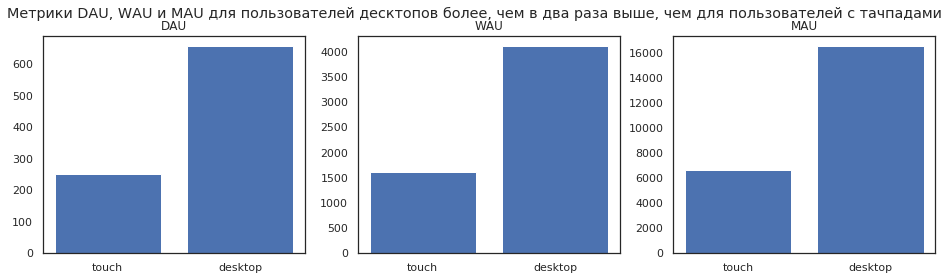

In [41]:
metrics = ['DAU', 'WAU', 'MAU']
fields = ['session_date', 'session_week', 'session_month']
fig, axs = plt.subplots(1,len(metrics),figsize=(16,4))

for i, metric in enumerate(metrics):
    datas = []
    for device in devices:
        users_short_list = users_parametrs[users_parametrs['device'] == device]['uid']
        data = visits[visits['uid'].isin(users_short_list)].groupby(fields[i]).agg({'uid': 'nunique'}).mean()
        datas.append(float(data))
    axs[i].bar(devices, datas)
    axs[i].set_title(metric)
fig.suptitle('Метрики DAU, WAU и MAU для пользователей десктопов более, чем в два раза выше, чем для пользователей с тачпадами')
plt.show()

Проделаем то же самое для разных источников рекламы:

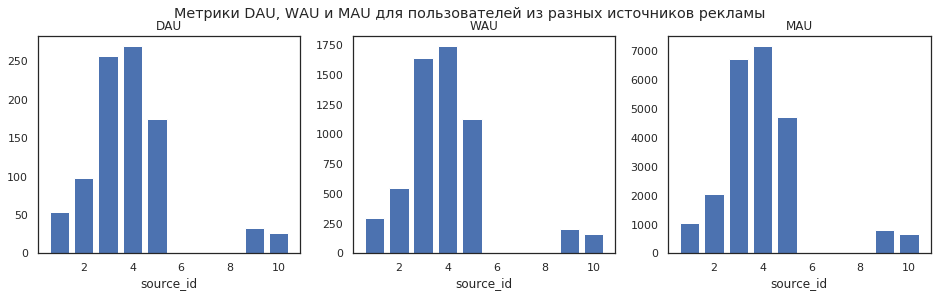

In [42]:
fig, axs = plt.subplots(1,len(metrics),figsize=(16,4))
for i, metric in enumerate(metrics):
    datas = []
    for source in sources:
        users_short_list = users_parametrs[users_parametrs['source_id'] == source]['uid']
        data = visits[visits['uid'].isin(users_short_list)].groupby(fields[i]).agg({'uid': 'nunique'}).mean()
        datas.append(float(data))
    axs[i].bar(sources, datas)
    axs[i].set_title(metric)
    axs[i].set(xlabel='source_id')
fig.suptitle('Метрики DAU, WAU и MAU для пользователей из разных источников рекламы')
plt.show()

Выше мы пришли к выводу, что среднее количество сесиий в день практически совпадает с метрикой DAU. Таким образом, для среднего числа сессий в день можно сделать те же выводы, касательно распределения по устройствам и источникам, что и для DAU: 
* среднее количество сесиий в день для пользователей с десктопами почти в 3 раза выше, чем для пользователей с тачпадами
* среднее количество сесиий в день максимально для пользователей из источников рекламы номер 3,4 и 5, близко к нулю для источников номер 7 и 7 и мало для источников 10 и 9.

### Шаг 2.1 Продукт. Вывод  <a id="step9"></a> 

Согласно проделанным выше рассчётам можно сделать следующие выводы:
* в среднем в день продуктом пользуются 908 человек, в неделю - 5716, а в месяц - 23228 человек
* пользователей с десктопами почти в три раза больше, чем пользователей с тачпадами (значит нужно улучшать в основном десктопную версию)
* источники рекламы приводят заметно различающееся число пользователей: больше всего посетителей из источников 4, 3 и 5. Источник 8 отсутствует, а источники 6 и 7 приносят пренебрежимо малое число клиентов.
* среднее количество сессий в день составляет 987, эта метрика практически совпадает с метрико DAU, поэтому для неё верны выводы из предыдущих двух пунктов
* характерная длительность сессии составляет 60 секунд

Для показателя возврата людей, пользователи были распределены по месячным когортам, в зависимости от даты первой активности. Построена тепловая карта показателя возврата пользователей (Retention Rate). Уже в следующий месяц после регистрации возвращается не более ~~9%~~ **6.9%** пользователей, в среднем это 843 человека. Таким образом, увеличение показателей возвратности - точка возможного роста.

### Шаг 2.2 Продажи  <a id="step10"></a> 

Первый вопрос этого шага: "Когда люди начинают покупать", т.е. нужно понять характерное количество дней между первой сессией и первой покупкой. Здесь нам понадобятся обе таблицы visits и orders. Первый визит мы уже подсчитали в столбце first_activity_date. Сделаем то же самое для заказов:

In [43]:
first_order_date = orders.groupby(['uid'])['buy_ts'].min()
first_order_date.name = 'first_order_date'
orders = orders.join(first_order_date,on='uid')
orders.head()

,buy_ts,revenue,uid,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00


Получим количество дней между первым визитом и первой покупкой: добавим в таблицу orders информацию о первой активности. Проверим, нет ли у нас пользователей, у которых покупка состоялась раньше, чем первая активность (потенциальные ошибки записи данных):

In [44]:
orders = orders.join(first_activity_date,on='uid')
orders.query('first_order_date < first_activity_date')

,buy_ts,revenue,uid,first_order_date,first_activity_date


Все заказы сделаны позже первого визита, ошибок записи данных нет, теперь можно подсчитать разницу между временем первого заказа и первого посещения.

In [45]:
orders['first_visit_first_order_time'] = orders['first_order_date'] - orders['first_activity_date']
orders['first_visit_first_order_time'] = orders['first_visit_first_order_time'] / np.timedelta64(1,'D')
orders['first_visit_first_order_time'] = orders['first_visit_first_order_time'].astype(int)
orders

,buy_ts,revenue,uid,first_order_date,first_activity_date,first_visit_first_order_time
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,0
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-31 09:11:00,0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-31 23:05:00,0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-31 23:52:00,0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2017-10-23 12:32:00,220


Возьмём срез из таблицы orders с уникальными пользователями:

In [46]:
len(orders['uid'].unique())


36523

In [47]:
start_buying = orders.groupby(['uid'])['first_visit_first_order_time'].min()
start_buying.describe()

count    36523.000000
mean        16.729869
std         46.959088
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: first_visit_first_order_time, dtype: float64

Видим, что среднее значение и медиана сильно отличаются друг от друга, а стандартное отклонение почти в 3 раза больше среднего значения. Построим распределение:

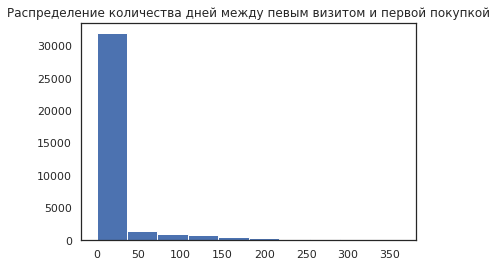

In [48]:
plt.hist(start_buying, bins=10)
plt.title('Распределение количества дней между певым визитом и первой покупкой')
plt.show()

Видим, что дни первого визита и первой покупки совпадают. Возможно, был выбран неверный масштаб, и более показательно было бы узнать колчиство времени между первым визитом и первой покупкой (например, кол-во секунд):

In [49]:
orders['first_visit_first_order_sec'] = orders['first_order_date'] - orders['first_activity_date']
start_buying_sec = orders.groupby(['uid'])['first_visit_first_order_sec'].min()
start_buying_sec.describe()

count                      36523
mean     16 days 21:40:10.550064
std      47 days 01:44:46.481416
min              0 days 00:00:00
25%              0 days 00:04:00
50%              0 days 00:16:00
75%              2 days 00:17:00
max            363 days 07:04:00
Name: first_visit_first_order_sec, dtype: object

In [50]:
start_buying_sec_mode = start_buying.mode()
start_buying_sec_mode
print(f"Характерный временной промежуток между первой сессией и первым заказом составляет {start_buying_sec_mode[0]} секунд.")

Характерный временной промежуток между первой сессией и первым заказом составляет 0 секунд.


Таким образом, преимущественно первый заказ происходит во время первой сессии.

Следующий вопрос нашего исследования - сколько раз покупают за период. Подсчитаем количество продаж за день, неделю, месяц. 

In [51]:
orders['action_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['action_week']  = orders['buy_ts'].astype('datetime64[W]')
orders['action_date'] = orders['buy_ts'].astype('datetime64[D]')

In [52]:
daily_orders_total = orders.groupby('action_date').agg({'uid': 'count'}).mean()
weekly_orders_total = orders.groupby(['action_week']).agg({'uid': 'count'}).mean()
monthly_orders_total = orders.groupby(['action_month']).agg({'uid': 'count'}).mean()

print(f"В среднем в день совершают {round(daily_orders_total[0])} заказов. В неделю - {round(weekly_orders_total[0])}, а в месяц - {round(monthly_orders_total[0])} заказов.")


В среднем в день совершают 139 заказов. В неделю - 951, а в месяц - 3878 заказов.


Прежде чем перейти к расчёту среднего времени, посмотрим, как зависит выручка от времени. Для этого будем агрегировать выручку Revenue понедельно и построим соответствующий график:

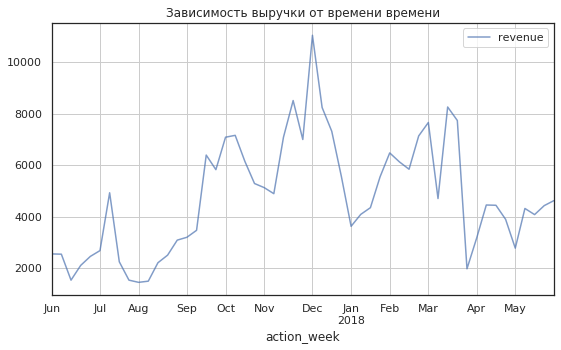

In [53]:
orders.groupby(['action_week']).agg({'revenue': 'sum'}).plot(kind='line', alpha=0.7, grid=True, figsize=(9,5), title= 'Зависимость выручки от времени времени')
plt.show()


По графику видно, что выручка была самой высокой в декабре месяце, а в первые недели ноября наблюдался один из провалов, хотя количество посещений в эти недели было максимальным. Т.е. основной пик посещаемости и выручки не совпал. Можно сделать также предположении о сезонности товара: в зимние месяцы выручка выше. Для подтверждения данной теории необходимо изучить данные ещё хотя бы за несколько лет, чтобы увидить повторяемость тенденции.

Подсчитаем средний чек также по месяцам, неделям и дням. Средний чек = суммарная прибыль / кол-во продаж. Мы уже знаем среднее кол-во продаж в день, неделю, и в месяц, осталось выяснить суммарную прибыль за те же периоды:

In [54]:
daily_revenue_total = orders.groupby('action_date').agg({'revenue': 'sum'}).mean()
weekly_revenue_total = orders.groupby(['action_week']).agg({'revenue': 'sum'}).mean()
monthly_revenue_total = orders.groupby(['action_month']).agg({'revenue': 'sum'}).mean()

average_check_day = daily_revenue_total[0] / daily_orders_total[0]
average_check_week = weekly_revenue_total[0] / weekly_orders_total[0]
average_check_month = monthly_revenue_total[0] / monthly_orders_total[0]

print(f"Средний чек при учёте временного периода в 1 день составляет {average_check_day:.1f} условных денежных единиц. Средний чек при расчёте по неделям - {average_check_week:.1f} условных денежных единиц, средний чек при расчёте помясячно - {average_check_month:.1f} условных денежных единиц.")
                               

Средний чек при учёте временного периода в 1 день составляет 5.0 условных денежных единиц. Средний чек при расчёте по неделям - 5.0 условных денежных единиц, средний чек при расчёте помясячно - 5.0 условных денежных единиц.


Итак, мы получили, что средний чек не зависит от того, по какому периоду мы проводи усреднение и составляет 5 условных денежных единиц. Тем не менее, хотелось бы понять, как меняется средний чек от времени. Построем временные ряды, сгруппировав заказы по дню, недели и месяцу:

In [55]:
daily_revenue = orders.groupby('action_date').agg({'revenue': 'sum'})
weekly_revenue = orders.groupby(['action_week']).agg({'revenue': 'sum'})
monthly_revenue = orders.groupby(['action_month']).agg({'revenue': 'sum'})
daily_orders = orders.groupby('action_date').agg({'uid': 'count'})
weekly_orders_total = orders.groupby(['action_week']).agg({'uid': 'count'})
monthly_orders_total = orders.groupby(['action_month']).agg({'uid': 'count'})

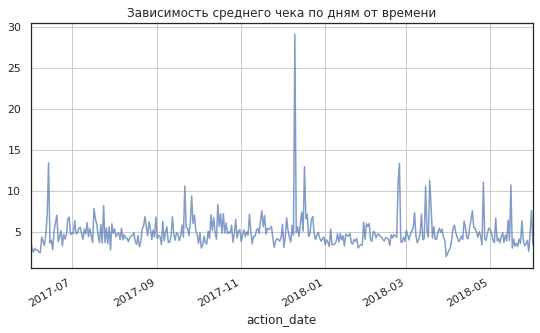

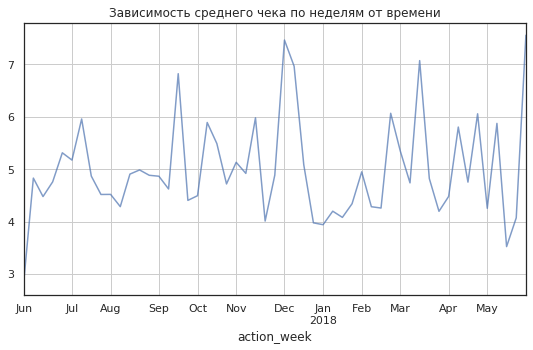

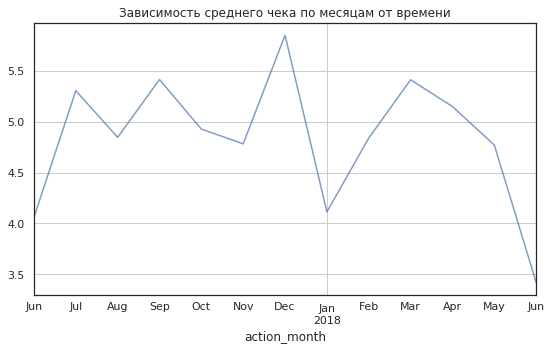

In [56]:
daily_average_check = (orders.groupby('action_date').agg({'revenue': 'sum'})['revenue'] / 
                       orders.groupby('action_date').agg({'uid': 'count'})['uid'])
daily_average_check.plot(kind='line', alpha=0.7, grid=True, figsize=(9,5), title= 'Зависимость среднего чека по дням от времени')
plt.show()
weekly_average_check = (orders.groupby('action_week').agg({'revenue': 'sum'})['revenue'] / 
                       orders.groupby('action_week').agg({'uid': 'count'})['uid'])
weekly_average_check.plot(kind='line', alpha=0.7, grid=True, figsize=(9,5), title= 'Зависимость среднего чека по неделям от времени')
plt.show()
monthly_average_check = (orders.groupby('action_month').agg({'revenue': 'sum'})['revenue'] / 
                       orders.groupby('action_month').agg({'uid': 'count'})['uid'])
monthly_average_check.plot(kind='line', alpha=0.7, grid=True, figsize=(9,5), title= 'Зависимость среднего чека по месяцам от времени')

plt.show()


Видим, что средний чек колеблется около значения 5 условных денежных единиц, в декабре он достигает своего максимального значения, а в январе минимального.

In [57]:
orders.head()

,buy_ts,revenue,uid,first_order_date,first_activity_date,first_visit_first_order_time,first_visit_first_order_sec,action_month,action_week,action_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,0,00:01:00,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,0,00:11:00,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,0,00:02:00,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,0,00:15:00,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,0,00:27:00,2017-06-01,2017-06-01,2017-06-01


Следующий вопрос - сколько денег приносят покупатели, обычно для этого считают LTV — «пожизненную» ценность клиента — итоговую сумму денег, которую один клиент приносит в среднем со всех своих покупок. LTV удобно считать по когортам, для этого нужно найти дату первой покупки каждого покупателя, вычислить число новых покупателей за каждую дату, добавить дату первой покупки в таблицу с заказами, сгруппировать таблицу и посчитать выручку:

In [58]:
def report_generation(df, users_short_list):
    """
    Функция принимает датафрейм df, по которому производится расчёт и список пользователей, которые участвуют в расчёте 
    (расчёт может производиться не по всем юзерам, фигурирующим в датафрейме) - users_short_list. 
    Функция формирует коготы: считает месяц первой покупки каждого покупателя(когорты формируются по месяцам), вычисляет число новых 
    покупателей за каждый месяц, добавляет месяц первой покупки в датафрейм, группирует таблицу и считает выручку/затраты.
    Функция возвращает отчёт, в котором в столбцах имеем следующие параметры:
    first_action_month - месяц, когда были сделаны первые заказы пользователей в когорте, или первые затраты,
    n_buyers - число пользователей в когорте,
    action_month - месяц, когда были сделаны заказы/расходы,
    revenue - выручка с заказов за месяц (action_month),
    age - возраст когорты.
    
    """
    df_short = df[df['uid'].isin(users_short_list)]
    first_action = df_short.groupby('uid').agg({'action_month': 'min'}).reset_index()
    first_action.columns = ['uid', 'first_action_month']

    cohort_sizes = first_action.groupby('first_action_month').agg({'uid': 'nunique'}).reset_index()
    cohort_sizes.columns = ['first_action_month', 'n_buyers']
    df_short_new = pd.merge(df_short,first_action, on='uid')
    cohorts = df_short_new.groupby(['first_action_month','action_month']).agg({'revenue': ['sum', 'count']}).reset_index()
    cohorts.columns = ['first_action_month', 'action_month', 'revenue', 'n_actions']
    
    report = pd.merge(cohort_sizes, cohorts, on='first_action_month')
    report['age'] = (report['action_month'] - report['first_action_month']) / np.timedelta64(1, 'M')
    report['age'] = report['age'].round().astype('int')
    report['ltv'] = report['revenue'] / report['n_buyers']
    
    return report

In [59]:
report_orders = report_generation(orders, users_parametrs['uid'])
report_orders

,first_action_month,n_buyers,action_month,revenue,n_actions,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,2354,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,177,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,174,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,226,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,292,4,1.022531
5,2017-06-01,2023,2017-11-01,1487.92,218,5,0.735502
6,2017-06-01,2023,2017-12-01,1922.74,276,6,0.950440
7,2017-06-01,2023,2018-01-01,1176.56,174,7,0.581592
8,2017-06-01,2023,2018-02-01,1119.15,212,8,0.553213
9,2017-06-01,2023,2018-03-01,1225.51,153,9,0.605788


В каждой строке полученного отчёта есть помесячная выручка от каждой когорты, её возраст и количество пользователей. Подсчитаем LTV:

In [60]:
output = report_orders.pivot_table(
        index='first_action_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round()
    
output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_action_month,,,,,,,,,,,,
2017-06-01,5.0,0,0,1,1,1,1,1,1,1,1,0
2017-07-01,6.0,0,1,0,0,0,0,0,0,0,0,
2017-08-01,5.0,0,0,0,0,0,0,0,0,0,,
2017-09-01,6.0,1,1,4,0,1,1,0,0,,,
2017-10-01,5.0,1,0,0,0,0,0,0,,,,
2017-11-01,5.0,0,0,0,0,0,0,,,,,
2017-12-01,5.0,0,1,1,0,0,,,,,,
2018-01-01,4.0,0,0,0,0,,,,,,,
2018-02-01,4.0,0,0,0,,,,,,,,


Подсчитаем, какова средняя пожизненная ценность клиента (LTV) методом cumsum():

In [61]:
output.cumsum(axis=1).mean(axis=0)

age
0      4.846154
1      5.272727
2      5.500000
3      6.222222
4      6.625000
5      7.285714
6      7.666667
7      8.400000
8      9.250000
9      8.000000
10    10.000000
11    13.000000
dtype: float64

По нашему периоду можно говорить о пожизненной ценности клиента максимум на конец 12-го месяца, она составляет 13 условных денежных единиц. К концу шестого месяца покупатель приносит в среднем 7.3 условные денежные единицы, т.е. 1.5 средних чека.

In [62]:
report_orders.head()

,first_action_month,n_buyers,action_month,revenue,n_actions,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,2354,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,177,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,174,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,226,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,292,4,1.022531


In [63]:
ltv_201706 = output.loc['2017-06-01'].sum()
ltv_201706

13.0

В среднем пользователь первой когорты принёс доход в 13 условных денежных единиц на конец 12-го месяца. Такова и средняя "пожизненная ценность клиента" за год. За полгода это значение составляет 7.5 условных денежных единиц, т.е. полтора средних чека. Мы не можем сравнивать когорты разного возраста по их суммарной прибыли, но можем увидеть общие тенденции поведения пользователей: 
* в среднем каждый пользователь приносит больше всего дохода в первый месяц
* доход от среднестатистического пользователя в первый месяц совпадает с размером среднего чека, т.е. весь доход получен при первом заказе
* пользователи сравнительно редко делают повторные заказы
* накопленный доход от каждого пользователя растёт очень слабо 
* доход от каждого повторного заказа в среднем примерно в 5 раз ниже дохода за первый месяц

После полученных результатов интересно получить более подробную информацию о среднем чеке: если мы получим таблицу, аналогичную output, но значениями там будут среднее количество заказов на 1 члена когорты за месяц, то поделив одну таблицу на другу, мы получим средний чек для каждой когорты, в зависимости от возраста когорты. В отчёте report_orders у нас уже есть столбец n_actions с количеством заказов пользователей когорты за месяц. Средний чек = суммарная прибыль / количество продаж:

In [64]:
report_orders['average_check'] = report_orders['revenue'] / report_orders['n_actions']
    
output = report_orders.pivot_table(
        index='first_action_month', 
        columns='age', 
        values='average_check', 
        aggfunc='mean').round()
    
output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_action_month,,,,,,,,,,,,
2017-06-01,4.0,6,5,9,7,7,7,7,5,8,12,6
2017-07-01,5.0,6,10,7,5,4,4,5,5,12,6,
2017-08-01,5.0,6,6,7,8,6,6,7,9,6,,
2017-09-01,5.0,13,8,63,15,15,17,11,8,,,
2017-10-01,4.0,7,5,6,5,5,4,4,,,,
2017-11-01,4.0,4,4,6,4,4,5,,,,,
2017-12-01,4.0,4,20,26,16,14,,,,,,
2018-01-01,4.0,4,6,8,3,,,,,,,
2018-02-01,4.0,5,3,4,,,,,,,,


In [65]:
output.cumsum(axis=1).mean(axis=0)

age
0      4.153846
1     10.363636
2     17.700000
3     33.000000
4     43.000000
5     53.428571
6     55.500000
7     67.200000
8     80.750000
9     64.666667
10    73.000000
11    83.000000
dtype: float64

Получен очень интересный результат: с возрастом когорта приносит гораздо меньше дохода, поскольку покупатели из когорты редко возвращаются, чтобы сделать повторный заказ. При этом, средний чек тех, кто вернулся, становится, как правило, заметно выше их первого среднего чека. Т.е. завоевав доверие клиента после первого заказа, компания получает при каждом следующем заказе раз более высокий доход, чем при его первой покупке.

### Шаг 2.2 Продажи. Вывод  <a id="step11"></a> 

Согласно проделанным выше рассчётам можно сделать следующие выводы:
* обычно пользователи делают первый заказ в первую же сессию (так поступает более 50% пользователей, ещё менее 25% всех пользователей делает заказ а течении двух дней после первой сессии).
* в среднем в день совершается 139 заказа, в неделю - 951, а в месяц - 3878
* средний чек составляет 5 условных денежных единиц, в декабре он достигает своего максимального значения, а в январе минимального
* накопленная выручка от пользователся растёт с возрастом когорты, но не сильно, поскольку клиенты редко возвращаются
* доход от среднестатистического пользователя в первый месяц совпадает с размером среднего чека, т.е. весь доход получен при первом заказе
* так, в среднем пользователь первой когорты принёс доход в 13 условных денежных единиц
* доход от повторных заказов примерно в 5 раз ниже дохода за первый месяц
* при этом, средний чек при повторных заказах, как правило, заметно выше среднего чека от первой покупки.


### Шаг 2.3 Маркетинг  <a id="step12"></a> 

Первый вопрос этого раздела состоит в том, сколько денег было потрачено всего, на каждый источник и по времени. Посмотрим на таблицу costs ещё раз:

In [66]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


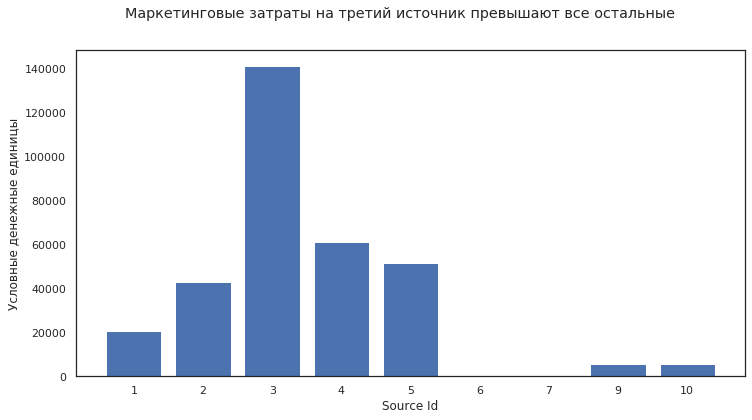

In [67]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
cost_per_source = []
for source in sources:
    cost_per_source.append(costs[costs['source_id'] == source]['costs'].sum())

cost_per_sources = pd.DataFrame({'source_id': sources, 'costs': cost_per_source})

numbers = np.arange(len(sources))
ax.bar(numbers, cost_per_source)

ax.set(xlabel='Source Id')
ax.set(ylabel='Условные денежные единицы')

ax.set_xticks(numbers)
ax.set_xticklabels(sources)

fig.suptitle('Маркетинговые затраты на третий источник превышают все остальные')
plt.show()

In [68]:
# таблица суммарных затрат на каждый источник
cost_per_sources
cost_per_sources['budget_share'] = round(cost_per_sources['costs'] / cost_per_sources['costs'].sum(), 2)
cost_per_sources

,source_id,costs,budget_share
0,1,20833.27,0.06
1,2,42806.04,0.13
2,3,141321.63,0.43
3,4,61073.60,0.19
4,5,51757.10,0.16
5,6,0.00,0.00
6,7,0.00,0.00
7,9,5517.49,0.02
8,10,5822.49,0.02


Видим, что затраты на третий источник практически равны суммарным затратам на все остальные источники. На источники 6, 7 и 8 ничего не было потрачено, их можно вообще убрать из рассмотрения. На источники 9 и 10 также было потрачено пренебрежимо малое количество денег.

In [69]:
costs_all = costs['costs'].sum()
print(f"Всего на рекламу было потрачено {costs_all} условных денежных единиц.")

Всего на рекламу было потрачено 329131.62 условных денежных единиц.


Назовём актуальными все источники, на которые был потрачен ненулевой маркетинговый бюджет и запишем их в новый список:

In [70]:
sources_actual = sorted(cost_per_sources[cost_per_sources['costs'] > 0]['source_id'].tolist())
sources_actual

[1, 2, 3, 4, 5, 9, 10]

In [71]:
cost_per_sources = cost_per_sources[cost_per_sources['costs'] > 0].reset_index(drop=True)

cost_per_sources

,source_id,costs,budget_share
0,1,20833.27,0.06
1,2,42806.04,0.13
2,3,141321.63,0.43
3,4,61073.60,0.19
4,5,51757.10,0.16
5,9,5517.49,0.02
6,10,5822.49,0.02


Посмотрим, как менялись затраты по времени для актуальных источников, сделаем агрегацию по месяцам, чтобы сгладить шум:

In [72]:
costs['month'] = costs['dt'].astype('datetime64[M]')
costs

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


In [73]:
costs_per_sources = pd.pivot_table(
    costs,
    index="month",
    columns="source_id",
    values="costs",
    aggfunc="sum"
)
costs_per_sources

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


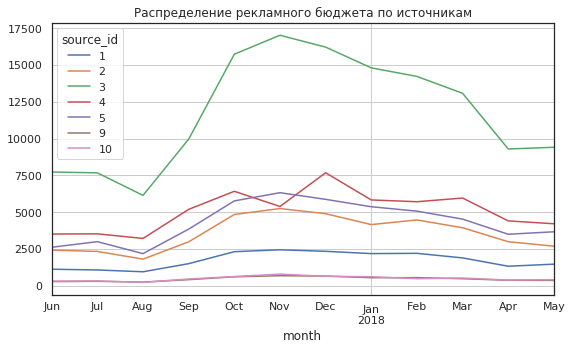

In [74]:
#fig, ax = plt.subplots(figsize=[8, 8])
costs_per_sources.plot(grid=True, figsize=(9,5), title= 'Распределение рекламного бюджета по источникам')
plt.show()


Видим, что рекламный бюджет распределялся во времени по разным источникам примерно одинаково. Подсчитаем, сколько стоило привлечение одного покупателя из каждого источника. У нас уже есть таблица users_parametrs, в которой каждому пользователю сопоставлен девайс и источник, из которого он пришёл. Но это пока пользователи, а не покупатели. Добавим в таблицу orders информацию о том, с какого девайса и из какого источника зашёл пользователь впервые:

In [75]:
orders = orders.merge(users_parametrs, on='uid')
orders

,buy_ts,revenue,uid,first_order_date,first_activity_date,first_visit_first_order_time,first_visit_first_order_sec,action_month,action_week,action_date,device,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,0,0 days 00:01:00,2017-06-01,2017-06-01,2017-06-01,desktop,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,0,0 days 00:11:00,2017-06-01,2017-06-01,2017-06-01,desktop,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,0,0 days 00:02:00,2017-06-01,2017-06-01,2017-06-01,desktop,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,0,0 days 00:15:00,2017-06-01,2017-06-01,2017-06-01,desktop,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,0,0 days 00:27:00,2017-06-01,2017-06-01,2017-06-01,desktop,3
...,...,...,...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-31 09:11:00,0,0 days 14:39:00,2018-05-01,2018-05-31,2018-05-31,touch,4
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-31 23:05:00,0,0 days 00:45:00,2018-05-01,2018-05-31,2018-05-31,desktop,10
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-31 23:52:00,0,0 days 00:02:00,2018-05-01,2018-05-31,2018-05-31,desktop,3
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2017-10-23 12:32:00,220,220 days 11:24:00,2018-05-01,2018-05-31,2018-05-31,desktop,3


Теперь можно подсчитать количество покупателей за весь исследуемый период для каждого источника:

In [76]:
orders_per_source = orders.groupby('source_id').agg({'uid':'nunique', 'revenue':'sum'}).reset_index()
orders_per_source.rename(
    columns={'uid': 'n_new_buyers'}, inplace=True)
# добавим данные о количестве привлечённых источником покупателей в таблицу cost_per_sources
cost_per_sources = cost_per_sources.merge(orders_per_source,on='source_id')
# разделив расходы на кол-во привлечённых клиентов, узнаем, сколько стоило привлечение одного покупателя из каждого источника
cost_per_sources['costs_per_buyers'] = round(cost_per_sources['costs'] / cost_per_sources['n_new_buyers'], 2)
cost_per_sources

,source_id,costs,budget_share,n_new_buyers,revenue,costs_per_buyers
0,1,20833.27,0.06,2899,31090.55,7.19
1,2,42806.04,0.13,3506,46923.61,12.21
2,3,141321.63,0.43,10473,54511.24,13.49
3,4,61073.60,0.19,10296,56696.83,5.93
4,5,51757.10,0.16,6931,52624.02,7.47
5,9,5517.49,0.02,1088,5759.40,5.07
6,10,5822.49,0.02,1329,4450.33,4.38


Посмотрим, какие рекламные источники уже окупились (принесли доходов от заказов больше, чем расходы на их поддержание):

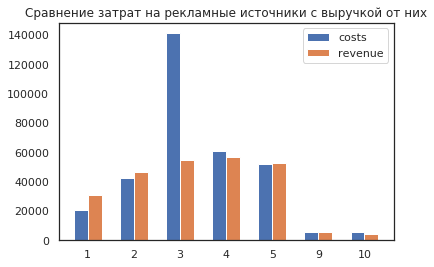

In [77]:
width = 0.3

x = cost_per_sources['source_id']
fig, ax = plt.subplots()
numbers = np.arange(len(x))
rects1 = ax.bar(numbers - width/2, cost_per_sources['costs'], width, label='costs')
rects2 = ax.bar(numbers + width/2, cost_per_sources['revenue'], width, label='revenue')

ax.set_title('Сравнение затрат на рекламные источники с выручкой от них')
ax.set_xticks(numbers)
ax.set_xticklabels(x)
ax.legend()
plt.show()

Как видно из диаграммы, источники 1, 2, 5 и 9 окупили затраты на них. Больше всего доходов, по сравнению с расходами, принёс источник номер 1, а самым убытычным оказался источник номер 3.

Изучим более детально, на сколько окупились расходы. Когорты будем формировать как в предыдущем пункте, т.е. по дате первого заказа. В идеале этот момент нужно уточнить у заказчика исследования (какая именно модель атрибуции подходит больше):

In [78]:
monthly_costs_total = costs.groupby('month').agg({'costs': 'sum'})
monthly_costs_total

,costs
month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35
2018-01-01,33518.52
2018-02-01,32723.03


In [79]:
def cac_romi_calc(report, monthly_costs):
    """
    Функция принимает датафрейм report, полученный в результате применения функции report_generation, в нём уже подсчитан ltv. 
    Также функция принимает датафрейм monthly_costs, где затраты распределены по месяцам,
    добавляет столбец о затратах по месяцам и вычисляет cac и romi в столбцах с соответствующими названиями,
    возвращает расширенный отчёт.
    
    """
    report_new = pd.merge(report, monthly_costs, left_on='first_action_month', right_on='month')
    report_new['cac'] = report_new['costs'] / report_new['n_buyers']
    report_new['romi'] = report_new['ltv'] / report_new['cac']
   
    return report_new

In [80]:
report_all = cac_romi_calc(report_orders, monthly_costs_total)
report_all

,first_action_month,n_buyers,action_month,revenue,n_actions,age,ltv,average_check,costs,cac,romi
0,2017-06-01,2023,2017-06-01,9557.49,2354,0,4.724414,4.060106,18015.00,8.905091,0.530530
1,2017-06-01,2023,2017-07-01,981.82,177,1,0.485329,5.547006,18015.00,8.905091,0.054500
2,2017-06-01,2023,2017-08-01,885.34,174,2,0.437637,5.088161,18015.00,8.905091,0.049145
3,2017-06-01,2023,2017-09-01,1931.30,226,3,0.954671,8.545575,18015.00,8.905091,0.107205
4,2017-06-01,2023,2017-10-01,2068.58,292,4,1.022531,7.084178,18015.00,8.905091,0.114825
5,2017-06-01,2023,2017-11-01,1487.92,218,5,0.735502,6.825321,18015.00,8.905091,0.082593
6,2017-06-01,2023,2017-12-01,1922.74,276,6,0.950440,6.966449,18015.00,8.905091,0.106730
7,2017-06-01,2023,2018-01-01,1176.56,174,7,0.581592,6.761839,18015.00,8.905091,0.065310
8,2017-06-01,2023,2018-02-01,1119.15,212,8,0.553213,5.279009,18015.00,8.905091,0.062123
9,2017-06-01,2023,2018-03-01,1225.51,153,9,0.605788,8.009869,18015.00,8.905091,0.068027


In [81]:
output = report_all.pivot_table(
      index='first_action_month', 
      columns='age', 
      values='romi', 
      aggfunc='mean')

output.cumsum(axis=1).round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_action_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10-01,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11-01,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12-01,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02-01,0.46,0.49,0.5,0.51,,,,,,,,


По таблице видим, что не все когорты окупаются, поэтому пока нельзя ответить на вопрос, когда в среднем окупаются когорты. Окупилась первая когорта (за 7 месяцев), а четвёртая окупилась гораздо быстрее (за четыре месяца). Тем не мене, нужно учитывать, что в датасете половина когорт моложе 7 месяцев, т.е. они могли ещё не успеть окупиться.

В исследовании также требуется сделать срезы по источникам и по девайсам. Сначала возьмём среды по источникам. У нас уже написаны функции для генерирования отчётов, нужно теперь сформировать для каждого источника свой users_short_list и monthly_costs.

In [82]:
def report_source_generation(source_number):
    """
    Функция принимает датафрейм df, по которому производится расчёт, номер источника, для которого производится расчёт и
    датасет с месячными расходами с разбивкой по источникам.
    Функция считает users_short_list - список пользователей, которые впервые заходили с источника рекламы с номером source_number
    и месячные расходы для каждого источника. С этими данными вызываются функции для формирования когорт и рассчётов ltv, cac и romi
    report_generation и cac_romi_calc
    
    Функция возвращает отчёт для источника с номером source_number.
    """
    users_short_list = users_parametrs[users_parametrs['source_id'] == source_number]['uid']
    report = report_generation(orders, users_short_list)
    
    monthly_costs_source = costs.groupby(['source_id', 'month']).agg({'costs':'sum'}).reset_index()
    monthly_costs_source = (monthly_costs_source[monthly_costs_source['source_id'] == source_number]
                            .loc[:, ['month', 'costs']])
    
    report_new = cac_romi_calc(report, monthly_costs_source)
    
    return report_new

In [83]:
report_1 = report_source_generation(1)
report_1.head(20)

,first_action_month,n_buyers,action_month,revenue,n_actions,age,ltv,month,costs,cac,romi
0,2017-06-01,190,2017-06-01,1378.70,268,0,7.256316,2017-06-01,1125.61,5.924263,1.224847
1,2017-06-01,190,2017-07-01,414.98,80,1,2.184105,2017-06-01,1125.61,5.924263,0.368671
2,2017-06-01,190,2017-08-01,419.43,87,2,2.207526,2017-06-01,1125.61,5.924263,0.372625
3,2017-06-01,190,2017-09-01,714.24,119,3,3.759158,2017-06-01,1125.61,5.924263,0.634536
4,2017-06-01,190,2017-10-01,811.20,114,4,4.269474,2017-06-01,1125.61,5.924263,0.720676
5,2017-06-01,190,2017-11-01,389.34,90,5,2.049158,2017-06-01,1125.61,5.924263,0.345892
6,2017-06-01,190,2017-12-01,490.48,106,6,2.581474,2017-06-01,1125.61,5.924263,0.435746
7,2017-06-01,190,2018-01-01,479.23,71,7,2.522263,2017-06-01,1125.61,5.924263,0.425751
8,2017-06-01,190,2018-02-01,432.15,88,8,2.274474,2017-06-01,1125.61,5.924263,0.383925
9,2017-06-01,190,2018-03-01,316.30,57,9,1.664737,2017-06-01,1125.61,5.924263,0.281003


In [84]:
output = report_1.pivot_table(
        index='first_action_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

output.cumsum(axis=1).round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_action_month,,,,,,,,,,,,
2017-06-01,1.22,1.59,1.97,2.6,3.32,3.67,4.1,4.53,4.91,5.19,5.4,5.68
2017-07-01,1.09,1.25,2.05,2.27,2.41,2.54,2.61,2.7,2.83,2.98,3.12,
2017-08-01,0.89,1.03,1.15,1.27,1.39,1.47,1.55,1.86,2.13,2.22,,
2017-09-01,0.91,1.18,1.27,1.41,1.41,1.43,1.44,1.49,1.57,,,
2017-10-01,0.88,1.04,1.07,1.13,1.14,1.16,1.18,1.23,,,,
2017-11-01,0.98,1.06,1.18,1.3,1.32,1.34,1.35,,,,,
2017-12-01,0.65,0.69,0.73,0.77,0.77,0.78,,,,,,
2018-01-01,0.63,0.64,0.65,0.76,0.76,,,,,,,
2018-02-01,0.58,0.71,0.72,0.76,,,,,,,,


Первый иточник в целом более прибылен, чем все компании вместе взятые: первый источник рекламы окупился для первой, второй и десятой когорты сразу (принёс в первый же месяц больше прибыли, чем на него было потрачено), подсчитаем, за сколько в среднем по когортам окупается первый источник:

In [85]:
output.cumsum(axis=1).mean(axis=0)


age
0     0.892768
1     1.048742
2     1.258675
3     1.363425
4     1.565990
5     1.768576
6     2.038114
7     2.362370
8     2.860597
9     3.462846
10    4.256256
11    5.679045
dtype: float64

In [86]:
def payback_month(report, source_number):

    output = report.pivot_table(
        index='first_action_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')
    ROMI_mean_sources[source_number] = output.cumsum(axis=1).mean(axis=0)
    larger_than_one = [c for c in ROMI_mean_sources[source_number] if c > 1]
    if len(larger_than_one) == 0:
        print("Источник", source_number, "не окупается.")
    else:
        min_age = list(ROMI_mean_sources[source_number]).index(larger_than_one[0])
        print("Источник ", source_number, " окупается в среднем к концу месяца номер ", min_age + 1, ".", sep='')
    

In [87]:
ROMI_mean_sources = {}
payback_month(report_1, 1)

Источник 1 окупается в среднем к концу месяца номер 2.


У нас всего семь источников, сделаем цикл, в котором создадим отчёты для каждого источника, узнаем, на каком месяце окупаются источники (если окупаются). 

In [88]:
reports_sources = {}
ROMI_mean_sources = {}
for source in sources_actual:
    reports_sources[source] = report_source_generation(source)
    #print(reports_sources[source])
    payback_month(reports_sources[source], source)

Источник 1 окупается в среднем к концу месяца номер 2.
Источник 2 окупается в среднем к концу месяца номер 5.
Источник 3 не окупается.
Источник 4 окупается в среднем к концу месяца номер 11.
Источник 5 окупается в среднем к концу месяца номер 4.
Источник 9 окупается в среднем к концу месяца номер 4.
Источник 10 не окупается.


Таким образом, быстрее всех окупился рекламный источник номер 2, медленнее всех окупился источник номер 4, а источники 3 и 10 так и не окупились. Посмотрим, как зависит от времения стоимость привлечения клиента для каждого источника (cac):

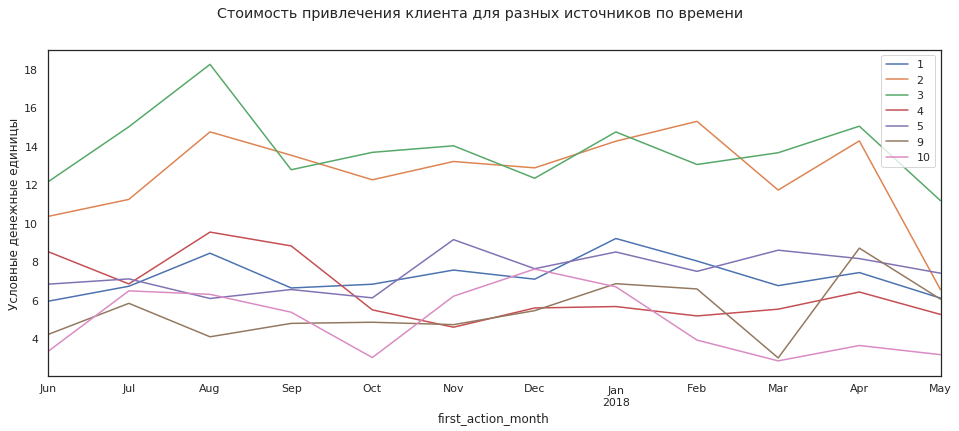

In [89]:
fig, ax = plt.subplots(figsize=[16, 6])
for source in sources_actual:
    reports_sources[source].groupby('first_action_month').agg({'cac': 'min'}).plot(ax=ax)

ax.legend(sources_actual)
ax.set(ylabel='Условные денежные единицы')
fig.suptitle('Стоимость привлечения клиента для разных источников по времени')
plt.show()

Подсчитаем среднее значение стоимости привлечения клиента для каждого источника: 

In [90]:
for source in sources_actual:
    
    print(f"Усреднённая по времени стоимость привлечения клиента для источника номер {source} составляет {round(reports_sources[source]['cac'].mean(), 2)} условных единиц.")
    

Усреднённая по времени стоимость привлечения клиента для источника номер 1 составляет 7.15 условных единиц.
Усреднённая по времени стоимость привлечения клиента для источника номер 2 составляет 12.64 условных единиц.
Усреднённая по времени стоимость привлечения клиента для источника номер 3 составляет 14.06 условных единиц.
Усреднённая по времени стоимость привлечения клиента для источника номер 4 составляет 6.98 условных единиц.
Усреднённая по времени стоимость привлечения клиента для источника номер 5 составляет 7.17 условных единиц.
Усреднённая по времени стоимость привлечения клиента для источника номер 9 составляет 5.06 условных единиц.
Усреднённая по времени стоимость привлечения клиента для источника номер 10 составляет 5.04 условных единиц.


Видим, что самая высокая стоимость привлечения у клиентов из источников два и три. Самая низкая у источников 9 и 10. Построим также график ROMI для "средней когорты" от возраста когорты в разбивке по источникам:

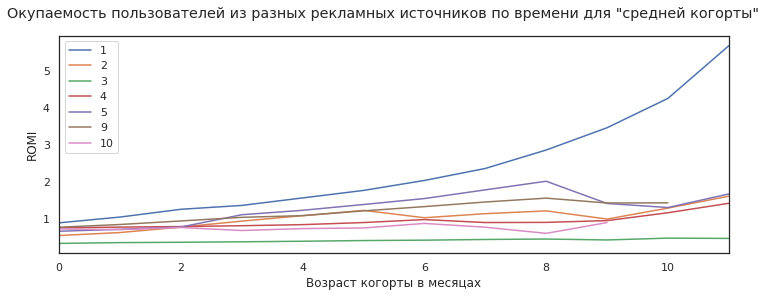

In [91]:
fig, ax = plt.subplots(figsize=[12, 4])
for source in sources_actual:
    ROMI_mean_sources[source].plot(ax=ax, legend=source)


ax.set(ylabel='ROMI')
ax.set(xlabel='Возраст когорты в месяцах')
ax.legend(sources_actual)
fig.suptitle('Окупаемость пользователей из разных рекламных источников по времени для "средней когорты"')
plt.show()

Логично, что для всех рекламных источников метрика ROMI растёт, поскольку это накопительная величина. По графику можно сказать, что заметно быстрее всех окупается рекламный источник номер 1.

Теперь посмотрим срез по девайсам. Посмотрим, как выглядит распределение ROMI для обоих видов девайсов. Для этого в начале нужно распределить расходы по девайсам. 

Сначала можно подсчитать количество покупателей за весь исследуемый период с каждого девайса:

In [92]:
users_parametrs = users_parametrs.merge(first_order_date.astype('datetime64[M]'), on='uid')
users_parametrs

,uid,device,source_id,first_order_date
0,16007536194108375387,desktop,5,2017-09-01
1,4499746016005494365,desktop,3,2017-11-01
2,9344114199116964256,desktop,5,2018-02-01
3,15667207291200562748,desktop,3,2018-01-01
4,9781067627250906649,desktop,5,2017-10-01
...,...,...,...,...
36518,18363291481961487539,desktop,2,2017-07-01
36519,18370831553019119586,touch,1,2018-01-01
36520,18387297585500748294,desktop,4,2018-03-01
36521,18388616944624776485,desktop,5,2017-11-01


In [93]:
users_parametrs_dev = pd.pivot_table(
    users_parametrs,
    index="first_order_date",
    columns="device",
    values="uid",
    aggfunc="count"
).reset_index()

users_parametrs_dev = users_parametrs_dev.fillna(0)
users_parametrs_dev['desktop'] = users_parametrs_dev['desktop'].astype('int')
users_parametrs_dev['touch'] = users_parametrs_dev['touch'].astype('int')
users_parametrs_dev['n_buyers'] = users_parametrs_dev['desktop'] + users_parametrs_dev['touch']
users_parametrs_dev

device,first_order_date,desktop,touch,n_buyers
0,2017-06-01,1702,321,2023
1,2017-07-01,1526,397,1923
2,2017-08-01,1114,256,1370
3,2017-09-01,2059,522,2581
4,2017-10-01,3532,808,4340
5,2017-11-01,3326,755,4081
6,2017-12-01,3497,886,4383
7,2018-01-01,2674,699,3373
8,2018-02-01,2807,844,3651
9,2018-03-01,2777,756,3533


In [94]:
costs_per_device = pd.merge(users_parametrs_dev, monthly_costs_total, left_on='first_order_date', right_on='month')
costs_per_device.rename(
    columns={'first_order_date': 'month', 'desktop': 'n_buyers_desktop', 'touch': 'n_buyers_touch'}, inplace=True)
costs_per_device


,month,n_buyers_desktop,n_buyers_touch,n_buyers,costs
0,2017-06-01,1702,321,2023,18015.00
1,2017-07-01,1526,397,1923,18240.59
2,2017-08-01,1114,256,1370,14790.54
3,2017-09-01,2059,522,2581,24368.91
4,2017-10-01,3532,808,4340,36322.88
5,2017-11-01,3326,755,4081,37907.88
6,2017-12-01,3497,886,4383,38315.35
7,2018-01-01,2674,699,3373,33518.52
8,2018-02-01,2807,844,3651,32723.03
9,2018-03-01,2777,756,3533,30415.27


Подсчитаем расходы на покупателей с каждым из девайсов:

In [95]:
costs_per_device['costs_desktop'] = round((costs_per_device['costs'] * costs_per_device['n_buyers_desktop'] 
                                     / costs_per_device['n_buyers']), 2)
costs_per_device['costs_touch'] = round((costs_per_device['costs'] * costs_per_device['n_buyers_touch'] 
                                     / costs_per_device['n_buyers']), 2)

costs_per_device

,month,n_buyers_desktop,n_buyers_touch,n_buyers,costs,costs_desktop,costs_touch
0,2017-06-01,1702,321,2023,18015.00,15156.47,2858.53
1,2017-07-01,1526,397,1923,18240.59,14474.85,3765.74
2,2017-08-01,1114,256,1370,14790.54,12026.76,2763.78
3,2017-09-01,2059,522,2581,24368.91,19440.37,4928.54
4,2017-10-01,3532,808,4340,36322.88,29560.46,6762.42
5,2017-11-01,3326,755,4081,37907.88,30894.78,7013.10
6,2017-12-01,3497,886,4383,38315.35,30570.11,7745.24
7,2018-01-01,2674,699,3373,33518.52,26572.35,6946.17
8,2018-02-01,2807,844,3651,32723.03,25158.46,7564.57
9,2018-03-01,2777,756,3533,30415.27,23906.94,6508.33


После того, как подсчитаны расходы на каждый девайс, можно подсчитать все метрики в разбивке по девайсам:

In [96]:
monthly_costs_device = {}
monthly_costs_device['desktop'] = costs_per_device.loc[:, ['month', 'costs_desktop']]
monthly_costs_device['desktop'].columns = ['month', 'costs']
monthly_costs_device['touch'] = costs_per_device.loc[:, ['month', 'costs_touch']]
monthly_costs_device['touch'].columns = ['month', 'costs']
monthly_costs_device['touch']

,month,costs
0,2017-06-01,2858.53
1,2017-07-01,3765.74
2,2017-08-01,2763.78
3,2017-09-01,4928.54
4,2017-10-01,6762.42
5,2017-11-01,7013.10
6,2017-12-01,7745.24
7,2018-01-01,6946.17
8,2018-02-01,7564.57
9,2018-03-01,6508.33


In [97]:
reports_devices = {}

for device in devices:
    
    users_short_list = users_parametrs[users_parametrs['device'] == device]['uid']
    report = report_generation(orders, users_short_list)
    
    
    reports_devices[device] = cac_romi_calc(report, monthly_costs_device[device])


In [98]:
output = reports_devices['touch'].pivot_table(
        index='first_action_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

print('Накопительный ROMI для пользователей тачпадов')
output.cumsum(axis=1).round(2).fillna('')

Накопительный ROMI для пользователей тачпадов


age,0,1,2,3,4,5,6,7,8,9,10,11
first_action_month,,,,,,,,,,,,
2017-06-01,0.43,0.47,0.48,0.49,0.52,0.52,0.53,0.53,0.53,0.55,0.56,0.59
2017-07-01,0.58,0.6,0.61,0.66,0.68,0.69,0.7,0.71,0.72,0.73,0.75,
2017-08-01,0.50,0.51,0.53,0.54,0.55,0.57,0.58,0.59,0.6,0.61,,
2017-09-01,0.53,0.73,0.83,0.89,0.89,0.91,1.06,1.09,1.1,,,
2017-10-01,0.53,0.58,0.6,0.6,0.62,0.62,0.63,0.63,,,,
2017-11-01,0.63,0.65,0.66,0.67,0.68,0.68,0.68,,,,,
2017-12-01,0.48,0.5,0.5,0.51,0.51,0.52,,,,,,
2018-01-01,0.39,0.4,0.41,0.41,0.42,,,,,,,
2018-02-01,0.45,0.47,0.47,0.48,,,,,,,,


Узнаем ROMI для "средней когорты": усредним ROMI для всех когорт за каждый месяц их жизни:

In [99]:
ROMI_mean_touch = output.cumsum(axis=1).mean(axis=0)
ROMI_mean_touch

age
0     0.514905
1     0.557712
2     0.587864
3     0.583319
4     0.607833
5     0.645507
6     0.696445
7     0.712000
8     0.737502
9     0.630322
10    0.652178
11    0.588383
dtype: float64

По таблице видно, что в среднем когорты пользователей тачпадов убыточны: окупилась только когорта номе четыре.

In [100]:
output = reports_devices['desktop'].pivot_table(
        index='first_action_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

print('Накопительный ROMI для пользователей десктопов')
output.cumsum(axis=1).round(2).fillna('')

Накопительный ROMI для пользователей десктопов


age,0,1,2,3,4,5,6,7,8,9,10,11
first_action_month,,,,,,,,,,,,
2017-06-01,0.55,0.61,0.66,0.79,0.92,1.02,1.14,1.22,1.29,1.37,1.45,1.47
2017-07-01,0.65,0.69,0.77,0.8,0.82,0.84,0.85,0.87,0.89,0.9,0.92,
2017-08-01,0.49,0.54,0.59,0.63,0.68,0.71,0.73,0.77,0.81,0.83,,
2017-09-01,0.61,0.71,0.76,1.27,1.32,1.4,1.46,1.48,1.51,,,
2017-10-01,0.61,0.68,0.7,0.73,0.74,0.76,0.77,0.79,,,,
2017-11-01,0.54,0.59,0.61,0.65,0.67,0.68,0.69,,,,,
2017-12-01,0.56,0.59,0.72,0.87,0.92,0.96,,,,,,
2018-01-01,0.42,0.46,0.49,0.51,0.52,,,,,,,
2018-02-01,0.47,0.5,0.51,0.52,,,,,,,,


Видно, что пользователи десктопной версии окупаются лучше: окупились когорты номер один и четыре. Посмотрим, как ведёт себя "средняя когорта пользователей десктопов":

In [101]:
ROMI_mean_desktop = output.cumsum(axis=1).mean(axis=0)
ROMI_mean_desktop

age
0     0.546946
1     0.587137
2     0.640787
3     0.752424
4     0.824128
5     0.909679
6     0.941129
7     1.026625
8     1.122923
9     1.033181
10    1.183073
11    1.474603
dtype: float64

In [102]:
devices

['touch', 'desktop']

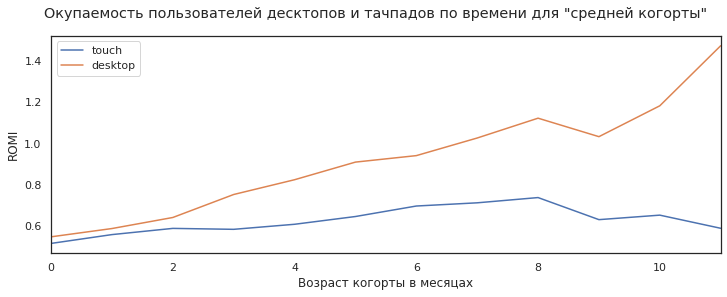

In [103]:
fig, ax = plt.subplots(figsize=[12, 4])
ROMI_mean_touch.plot(ax=ax)
ROMI_mean_desktop.plot(ax=ax)

ax.legend(devices)
ax.set(ylabel='ROMI')
ax.set(xlabel='Возраст когорты в месяцах')
fig.suptitle('Окупаемость пользователей десктопов и тачпадов по времени для "средней когорты"')
plt.show()

Судя по поведению "средних когорт", окупаемость пользователей десктопов превышает окупаемсть пользователей тачпадов на протяжении всего исследования.

### Шаг 2.3 Маркетинг. Вывод  <a id="step13"></a> 

По проделанным рассчётам можно сделать следующие выводы:
* всего на рекламу было потрачено 329131.62 условных денежных единиц
* затраты на источник номер 3 сравнимы с затратами на все остальные источники вместе взятые
* расходы на все источники по времени имеют примерно одинаковых характер
* большьше всего доходов по сравнению с расходами принёс источник номер один
* самый убыточный источник рекламы - источник номер три

Средняя стоимость привлечения клиентов для каждого источника такова:
* для источника номер 1 составляет 7.15 условных денежных единиц
* для источника номер 1 составляет 12.64 условных денежных единицы
* для источника номер 1 составляет 14.06 условных денежных единиц
* для источника номер 1 составляет 6.98 условных денежных единиц
* для источника номер 1 составляет 7.17 условных денежных единиц
* для источника номер 1 составляет 5.06 условных денежных единицы
* для источника номер 1 составляет 5.04 условных денежных единицы.

При подсчёте окупаемости затрат было выявлено следующее:
* большая часть когорт ещё не окупились: 10 против 2
* быстрее всего окупилась когорта номер четыре: за четыре месяца, а первая за семь
* для ответа на вопрос, когда в среднем окупаются когорты, нужно больше данных (в нашем датасете половина когорт младше 7 месяцев)

Была подсчитана метрика ROMI для разных источников и разных девайсов:
* самая высокая стоимость привлечения у клиентов из источников два и три
* cамая низкая стоимость привлечения у клиентов из источников 9 и 10 
* быстрее всех окупился источник номер 2 - к концу второго месяца
* источники рекламы 5 и 9 окупились к концу четвёртого месяца
* источники номер 3 и 10 не окупились
* при изучении срезов по девайсам установлено, что окупаемость пользователей десктопов превышает окупаемсть пользователей тачпадов на протяжении всего исследования.

## Общие выводы  <a id="step14"></a> 

Из таблиц visits и orders видим, что на 359400 визитов приходится всего 50415 заказов. Изучив также показатель Retention Rate (сколько пользователей из когорты относительно их изначального числа вернулось в последующие периоды), можно сделать вывод о том, что пользователи очень редко возвращаются, т.е. одна из точек роста - развитие продукта в сторону увеличения повторных визитов и повторных заказов. Больше всего пользователей приходит из источников 4, 3 и 5.

С возрастом когорта приносит гораздо меньше дохода, поскольку покупатели из когорты редко возвращаются, чтобы сделать повторный заказ. При этом, средний чек тех, кто вернулся, становится, как правило, заметно выше их первого среднего чека. Т.е. завоевав доверие клиента после первого заказа, компания получает при каждом следующем заказе более высокий доход, чем при его первой покупке. Поэтому рекомендуемый следующий шаг изучения поведения клиентов - узнать, есть ли источники рекламы, которые приводят тех клиентов, которые впоследствии делают поторные заказы.

На основе ROMI для "средней когорты" можно сказать, что затраты на рекламу для пользователей десктопов окупаются сразу, т.е. гораздо лучше, чем затраты на рекламу для пользователей тачпадов. Это означает, что стоит и дальшьше развивать дескнопную версию и вкладывать больше средств в привлечение пользователей этих платформ.

Изучение расходов бюджета на рекламные источники дало следующие результаты:

* источники 1, 2, 5 и 9 окупили затраты на них
* больше всего доходов по сравнению с расходами, принёс источник номер 1, хотя на него потратили всего 6% от рекламного бюджета 
* самым убытычным источником рекламы оказался источник номер 3, при этом на него было потрачено 43% рекламного бюджета (почему?)
* основываясь на зависимости метрики ROMI от времени для "средней когорты", можно сказать, что самым быстроокупающимся источником рекламы является источник номер один, поэтому это **самый привлекательный источник рекламы для последующих вложений**
* вторым по привлекательности видится источник номер два (он окупился не так быстро как первый, но уже принёс заметный по сравнению с затратами на него доход)
* источники 5 и 9 также привлекательны для вложений, поскольку у них гораздо ниже стоимость привлечения клиента (метрика CAC), чем у источника номер 2, при этом они принесли меньший доход.

Исходя из того, что клиенты делают заказ преимущественно уже в первое посещение (если они вообще делают заказы), то рекомендуется увеличивать рекламный бюджет на каждый источник пропорционально отклику.